<a name = "inicio"></a>

1. [Introducción](#Introducción)
1. [Base teórica](#Base-teórica)
    1. [Carga y transformación de datos](#Carga-y-transformación-de-datos)
    1. [Tipos de datos temporales en pandas](#Tipos-de-datos-temporales-en-pandas)
    1. [Herramientas de pandas](#Herramientas-de-pandas)
        1. [Remuestreado](#Remuestreado)
        1. [Interpolado](#Interpolado)
        1. [Truncado](#Truncado)
        1. [Desplazamientos](#Desplazamientos)
        1. [Diferencias](#Diferencias)
    1. [Conceptos matemáticos](#Conceptos-matemáticos)
        1. [Correlación](#Correlación)
        1. [Autocorrelación](#Autocorrelación)
        1. [La función de autocorrelación (ACF)](#La-función-de-autocorrelación-(ACF))
        1. [La función de autocorrelación parcial (PACF)](#La-función-de-autocorrelación-parcial-(PACF))
        1. [Ruido blanco](#Ruido-blanco)
1. [Modelos ARIMA](#Modelos-ARIMA)
    1. [El modelo Autorregresivo (AR)](#El-modelo-Autorregresivo-(AR))
        1. [AIC y BIC](#AIC-y-BIC)
        1. [Predicción](#Predicción)
    1. [El modelo Moving Average (MA)](#El-modelo-Moving-Average-(MA))
    1. [El modelo ARMA](#El-modelo-ARMA)
    1. [Series estacionarias (stationary series)](#Series-estacionarias-(stationary-series))
        1. [El test de Dicky-Fuller Aumentado](#El-test-de-Dicky-Fuller-Aumentado)
        1. [Transformaciones](#Transformaciones)
        1. [Integración](#Integración)
    1. [Perfiles de los datos AR y MA](#Perfiles-de-los-datos-AR-y-MA)
        1. [Datos AR](#Datos-AR)
        1. [Datos MA](#Datos-MA)
    1. [El modelo ARIMA](#El-modelo-ARIMA)
    1. [El modelo ARMAX](#El-modelo-ARMAX)
    1. [Búsqueda en bucle del mejor modelo](#Búsqueda-en-bucle-del-mejor-modelo)
    1. [Descomposición de una serie estacional](#Descomposición-de-una-serie-estacional)
    1. [El modelo SARIMA](#El-modelo-SARIMA)
    1. [Diagnóstico del modelo](#Diagnóstico-del-modelo)
    1. [Automatización del cálculo de los órdenes óptimos](#Automatización-del-cálculo-de-los-órdenes-óptimos)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

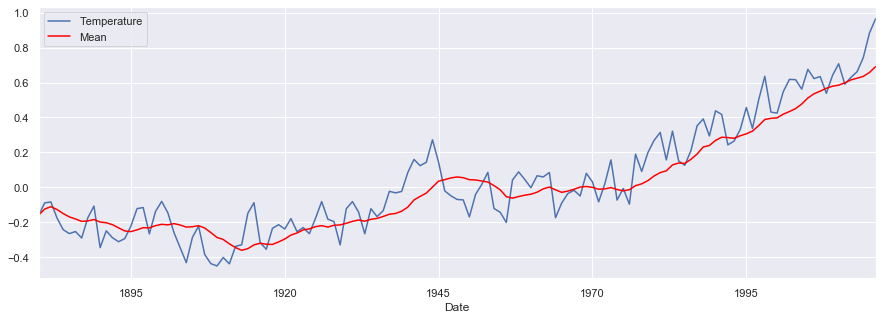

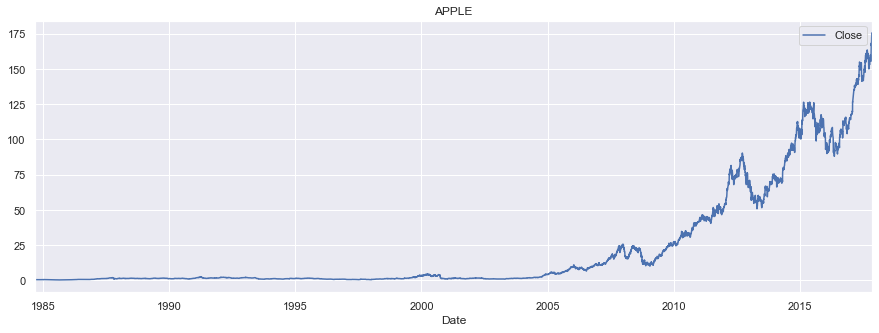

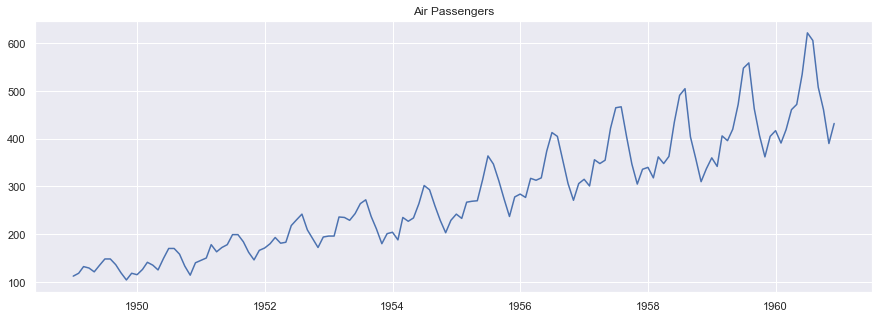

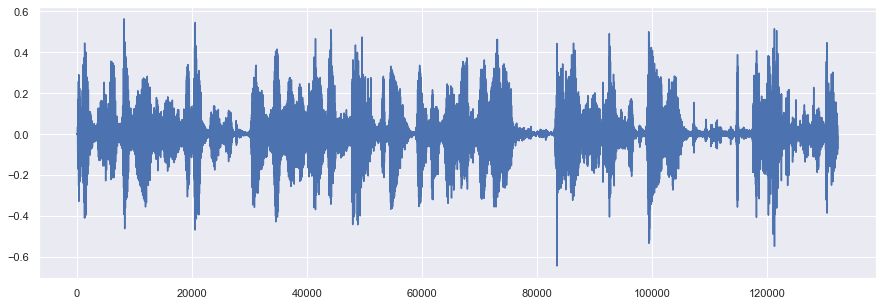

# Base teórica
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Carga y transformación de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos cargando un conjunto de datos con información temporal: el dataset <i>candy</i> con información sobre la producción de caramelos en los Estados Unidos.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga y muestra en pantalla los datos relativos al valor bursátil de IBM (dataset "ibm.txt"). Quédate apenas con el campo "Close" (además del campo que contiene la fecha, por supuesto).</div>
</div>

## Tipos de datos temporales en pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### La clase Timestamp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [ ]:
pd.Timestamp("1/2/2019")

In [ ]:
pd.Timestamp(2019, 2, 1)

In [ ]:
pd.Timestamp(2019, 2, 1, 16, 17, 22)

In [ ]:
pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)

In [ ]:
from datetime import date

In [ ]:
pd.Timestamp(date(2019, 8, 26))

In [ ]:
d = pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)
d

In [ ]:
print(d.year)
print(d.month)
print(d.day)
print(d.hour)
print(d.minute)
print(d.second)
print(d.microsecond)
print(d.nanosecond)

In [ ]:
print(d.quarter)
print(d.week)
print(d.dayofweek)
print(d.dayofyear)
print(d.day_name())
print(d.month_name())

#### La clase Period

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

In [ ]:
p = pd.Period("2017-01")
p

In [ ]:
p.start_time

In [ ]:
p.end_time

In [ ]:
p.asfreq("D")

In [ ]:
p = pd.Period("2017-05-23")
p.asfreq("M")

In [ ]:
p.asfreq("D")

In [ ]:
pd.Period("2018-05").to_timestamp()

In [ ]:
p = pd.Period("2017-05-23")
p + 2

In [ ]:
p = pd.Period("2017-05-23")
q = pd.Period("2017-05-28")
q - p

#### La clase Timedelta

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html

In [ ]:
d = pd.Timedelta(weeks = 1, days = 2, hours = 3, minutes = 4, seconds = 5, milliseconds = 6,
                 microseconds = 7, nanoseconds = 8)
d

In [ ]:
print(d.days)
print(d.seconds)
print(d.microseconds)
print(d.nanoseconds)

In [ ]:
pd.Timedelta("1 day 1 second")

In [ ]:
pd.Timedelta("1 day 1 millisecond")

In [ ]:
pd.Timedelta("1 hour")

In [ ]:
pd.Timedelta("2 hour")

In [ ]:
pd.Timedelta("2 hours")

In [ ]:
pd.Timedelta("2.3 hours")

In [ ]:
pd.Timestamp(2019, 8, 25, 18, 49) + pd.Timedelta("3 hours")

#### La clase date_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

In [ ]:
pd.date_range("August, 28 2018", periods = 5, freq = "M")

In [ ]:
pd.date_range("August, 28 2018", periods = 5, freq = "D")

In [ ]:
pd.date_range(start = date(2019, 8, 13), end = date(2019, 9, 21), freq = "W")

In [ ]:
pd.date_range(start = "2018-01-1", end = "2019-12-31", freq = "MS")

In [ ]:
from datetime import datetime

In [ ]:
pd.date_range(start = datetime.today(), periods = 5, freq = "H")

In [ ]:
pd.date_range(start = "2019-1-1", end = "2019-3-1", periods = 4)

In [ ]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B")

In [ ]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B") + pd.Timedelta("3 hours")

<div style="background:#0099cc;padding:20px;color:#ffffff">
    <strong>EJERCICIO</strong>
Crea un dataframe df con 12 fechas consecutivas (interpretadas como puntos en el tiempo) a partir del 1 de enero de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
Crea un dataframe df con 6 horas consecutivas (interpretadas como períodos) a partir de las 6 de la tarde del 11 de marzo de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

#### La clase period_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html

In [ ]:
p = pd.period_range(start = "2019-1-1T15:0:0", periods = 12, freq = "H")
p

## Herramientas de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Remuestreado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

Leamos el dataset *global_temperature_monthly.csv*. ¿Las muestras están distribuidas tal y como necesitamos?

Esto es especialmente útil si las fechas no son periódicas, como ocurre en el dataset months.csv:

In [ ]:
data = pd.read_csv("months.csv", parse_dates = ["date"], index_col = "date")
data

### Interpolado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

Una herramienta muy útil es la que nos permite sustituir valores nulos por el resultado de interpolar los valores existentes, lo que puede ocurrir si aplicamos a un dataframe una frecuencia: df = df.asfreq("D"). Veámoslo en el dataset de days.csv

### Truncado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html

Otro útil método es .truncate(), que nos permite eliminar los índices anteriores y/o posteriores a uno dado.

**IMPORTANTE**: El índice deberá estar ordenado.

Podemos aplicarlo a candy... tanto con períodos mensuales como anuales.

### Desplazamientos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método .shift() aplicado a una serie o a un dataframe nos permite desplazarlo en una dirección (por defecto hacia abajo):

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
data = pd.DataFrame(np.random.randint(0, 10, 20).reshape(4, -1), columns = list("ABCDE"))
data

### Diferencias
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

El método .diff() permite calcular la diferencia de las columnas o filas de un dataframe:

In [ ]:
data

In [ ]:
s = pd.Series([2, 5, 4, 7, 6, 1, 5, 3])
s

## Conceptos matemáticos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Correlación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Alta correlación (positiva):

In [ ]:
r = pd.Series([3.4, 8.9, 6.8, 0.6, 4.6, 8.4, 7.8, 1.3, 5.0 , 0.7])
s = pd.Series([6.4, 9.8, 8.8, 4.8, 6.9, 9.4, 7.8, 3.7, 7.7, 6.0 ])

Alta correlación (negativa):

In [ ]:
r = pd.Series([7.5, 8.8, 8.2, 4.5, 5.5, 6.4, 9.8, 6.2, 4.5, 8.7])
s = pd.Series([4.4, 5.6, 6.1, 9.9, 8.3, 8.3, 2.2, 8.4, 7.4, 4.3])

Baja correlación:

In [ ]:
r = pd.Series([8.4, 5.3, 3.2, 9. , 1.2, 4.1, 7.3, 7.2, 2.8, 3.7])
s = pd.Series([6.3, 9. , 4.3, 5.5, 6.8, 9.6, 4.4, 1.6, 5.6, 0.5])

http://tylervigen.com/view_correlation?id=1703

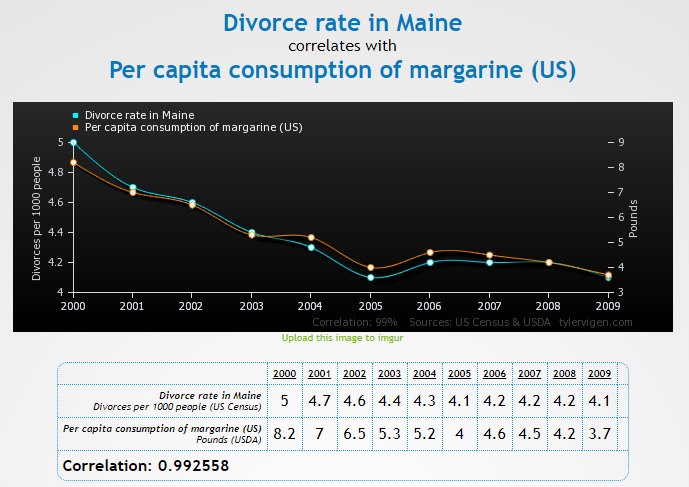

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en una gráfica la evolución de los valores bursátiles de IBM y Apple, y calcula la correlación entre ellos. Quédate solo con la columna "Close" (además de la que contiene la etiqueta temporal).</div>
</div>

### Autocorrelación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
s = pd.Series(np.random.randint(0, 5, (10, )))
s

¿Qué tipo de series mostrarán autocorrelación alta para algún lag?

In [ ]:
x = np.linspace(0, 12, 24)
y = np.sin(x)
y = pd.Series(y)

In [ ]:
plt.plot(y);
print(y.corr(y))

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Calcula la autocorrelación de la función senoidal y para los lags entre 0 y 19</div>
</div>

### La función de autocorrelación (ACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Tanto en acf como en plot_acf deberemos usar el parámetro unbiased = True para evitar que influya el número limitado de muestras.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en pantalla la función de autocorrelación de candy para los 50 primeros lags. Interpreta el resultado</div>
</div>

### La función de autocorrelación parcial (PACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Para evitar errores, podemos vernos obligados a especificar el método de cálculo: method = "ywm"

### Ruido blanco
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Modelos ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## El modelo Autorregresivo (AR)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<strong>R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo

AR(1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + &epsilon;<sub>t</sub>

AR(2): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + &epsilon;<sub>t</sub>

AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub>

Candy - AR(2):

### AIC y BIC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Compara los valores de AIC y BIC para los modelos AR de orden 1 y 2 aplicados a candy.</div>
</div>

### Predicción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Podemos acceder a los valores predichos para los datos en los que el modelo se ha entreado con el atributo .fittedvalues:

In [ ]:
model.fittedvalues

Es posible calcular el error cuadrático medio -por ejemplo-:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(candy.production, model.fittedvalues)

## El modelo Moving Average (MA)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<strong>R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub></strong>

p: orden del modelo:

MA(1): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

MA(2): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + &epsilon;<sub>t</sub>

MA(q): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>p</sub>.&epsilon;<sub>t-p</sub> + &epsilon;<sub>t</sub>

Candy - MA(3):

In [ ]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [ ]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo ARMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1, 1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMA(p, q): AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + a<sub>p</sub>.R<sub>t-p</sub> + R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&

Candy - ARMA(2, 3):

In [ ]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [ ]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## Series estacionarias (stationary series)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

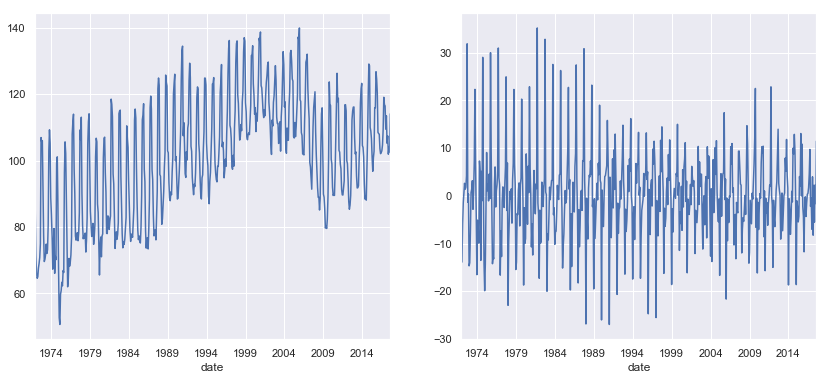

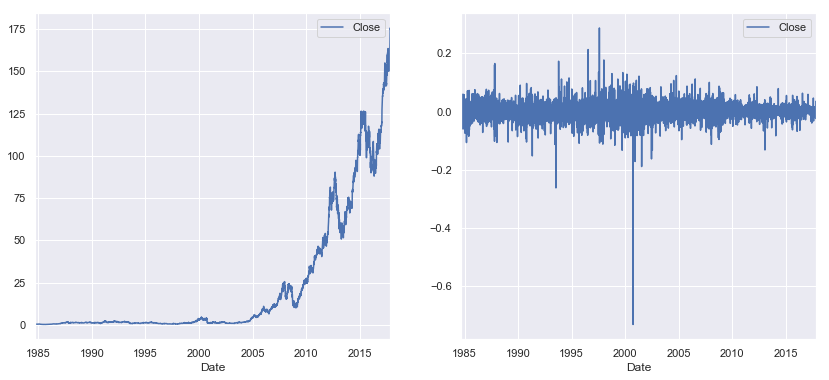

### El test de Dicky-Fuller Aumentado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Transformaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

###### Diferencia

###### Porcentaje de cambio

Apliquémoslo al dataset AirPassengers.csv.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga el dataset AirPassengers.csv, aplica el método visto y pásale el test de Dicky-Fuller aumentado ¿es estacionario?</div>
</div>

###### Logaritmo

###### Otras funciones

###### Funciones combinadas

air_passengers + log + diff

### Integración
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Perfiles de los datos AR y MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample

### Datos AR
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo AR(2)</div>
</div>

### Datos MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo MA(2)</div>
</div>

## El modelo ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Candy - ARIMA(3, 1, 2)

In [ ]:
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [ ]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo ARMAX
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

ARMA(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMAX(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub> + x<sub>1</sub>z<sub>t</sub>

In [ ]:
ventas = pd.Series([10, 22, 15, 10, 25, 30, 18])

In [ ]:
festivos = pd.Series([1, 0, 0, 0, 0, 1, 1])

In [ ]:
lower = prediction.conf_int()["lower y"]
upper = prediction.conf_int()["upper y"]

In [ ]:
fig, ax = plt.subplots()
ventas.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el ejercicio suponiendo que ambos días van a ser festivos</div>
</div>

## Búsqueda en bucle del mejor modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
best_aic = 999999
for p in range(4):
    for q in range(4):
        for d in range(2):
            try:
                model = SARIMAX(candy, order = (p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    print(p, d, q, model.aic, model.bic)
            except:
                pass

## Descomposición de una serie estacional
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
model = SARIMAX(candy, order = (3, 1, 2)).fit()
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo SARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA(2, 0, 1):&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + a<sub>2</sub>y<sub>t-2</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

SARIMA(0, 0, 0)(2, 0, 1)<sub>7</sub>:&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>7</sub>y<sub>t-7</sub> + a<sub>14</sub>y<sub>t-14</sub> + m<sub>7</sub>&epsilon;<sub>t-7</sub> + &epsilon;<sub>t</sub>

model = SARIMAX(dataframe, order = (p, i, q), seasonal_order = (P, I, Q, S), trend = "c")

Convendrá convertir el índice del dataframe a timestamp para evitar problemas con la función plot_diagnostics...

Candy - SARIMA(3,1,2)(1, 1, 2, 12):

In [ ]:
prediction = model.get_forecast(steps = 12)

In [ ]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [ ]:
candy.truncate(before = "2010").plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## Diagnóstico del modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
model.resid.head()

In [ ]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()

In [ ]:
model.summary()

## Automatización del cálculo de los órdenes óptimos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [ ]:
import pmdarima as pm

http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html

In [ ]:
model = pm.auto_arima(
    candy,
    m = 12,
    suppress_warnings=True
)

In [ ]:
model.summary()

In [ ]:
fig = model.plot_diagnostics()
fig.set_size_inches(15, 9)
plt.show()

In [ ]:
forecast_mean, conf_int = model.predict(24, return_conf_int = True)

In [ ]:
forecast_lower = conf_int[:, 0]
forecast_upper = conf_int[:, 1]

In [ ]:
dates = pd.period_range(start = candy.index[-1], periods = 25, freq = "M")[1:]
dates

In [ ]:
forecast = pd.Series(forecast_mean, index = dates)

In [ ]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
forecast.plot(ax = ax, color = "red")
plt.fill_between(dates, forecast_lower, forecast_upper, color = "lightblue", alpha = 0.6)
plt.show()